<a href="https://colab.research.google.com/github/Rodiat/FDSfE_RAyinde/blob/main/InClass/Rodiat_10_27_22_LogRegre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
bank = pd.read_csv("https://github.com/fedhere/FDSfE_FBianco/raw/main/data/bank_term_deposit.csv")

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        1042 non-null   int64 
 1   job        1042 non-null   object
 2   marital    1042 non-null   object
 3   education  1042 non-null   object
 4   default    1042 non-null   object
 5   balance    1042 non-null   int64 
 6   housing    1042 non-null   object
 7   loan       1042 non-null   object
 8   contact    1042 non-null   object
 9   day        1042 non-null   int64 
 10  month      1042 non-null   object
 11  duration   1042 non-null   int64 
 12  campaign   1042 non-null   int64 
 13  pdays      1042 non-null   int64 
 14  previous   1042 non-null   int64 
 15  poutcome   1042 non-null   object
 16  y          1042 non-null   object
dtypes: int64(7), object(10)
memory usage: 138.5+ KB


In [4]:
bank["y"].unique()

array(['no', 'yes'], dtype=object)

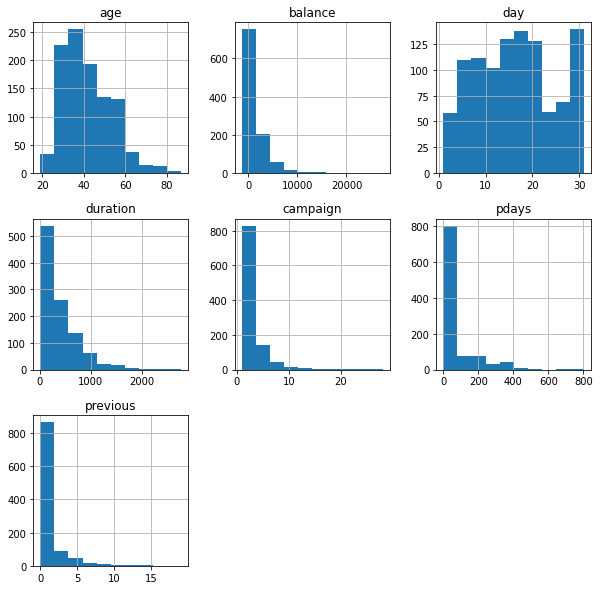

In [5]:
bank.hist(figsize = (10, 10));

In [6]:
cols = ["age", "balance", "duration", "marital"]
features = bank[cols]
target = bank["y"]

In [7]:
features["marital"].unique()

array(['married', 'divorced', 'single'], dtype=object)

In [8]:
pd.get_dummies(features["marital"])

,divorced,married,single
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1037,0,0,1
1038,0,1,0
1039,0,0,1
1040,0,0,1


In [18]:
features = features.join(pd.get_dummies(features["marital"])).drop(columns="marital")

In [19]:
features

,age,balance,duration,divorced,married,single
0,38,1663,217,0,1,0
1,38,595,245,1,0,0
2,34,360,46,0,1,0
3,60,1025,388,0,1,0
4,42,520,158,0,1,0
...,...,...,...,...,...,...
1037,26,668,576,0,0,1
1038,60,362,816,0,1,0
1039,42,1080,951,0,0,1
1040,32,620,1234,0,0,1


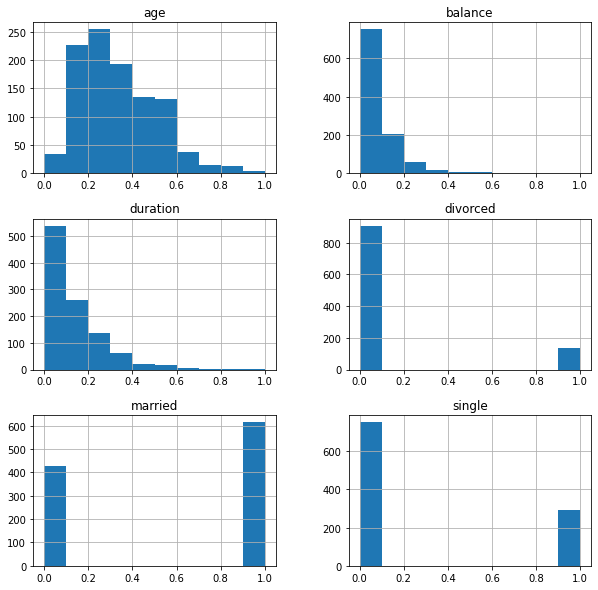

In [20]:
((features - features.min())/ (features.max() - features.min())).hist(figsize = (10, 10));

In [22]:
features = ((features - features.min())/ (features.max() - features.min()))

In [23]:
features

,age,balance,duration,divorced,married,single
0,0.279412,0.103701,0.075697,0.0,1.0,0.0
1,0.279412,0.066448,0.085838,1.0,0.0,0.0
2,0.220588,0.058251,0.013763,0.0,1.0,0.0
3,0.602941,0.081447,0.137631,0.0,1.0,0.0
4,0.338235,0.063832,0.054328,0.0,1.0,0.0
...,...,...,...,...,...,...
1037,0.102941,0.068994,0.205723,0.0,0.0,1.0
1038,0.602941,0.058321,0.292648,0.0,1.0,0.0
1039,0.338235,0.083365,0.341543,0.0,0.0,1.0
1040,0.191176,0.067320,0.444042,0.0,0.0,1.0


In [31]:
lg = LogisticRegression()

In [32]:
lg.fit(features,target)

LogisticRegression()

In [33]:
lg.coef_

array([[ 1.28185231,  0.87628753,  7.25857348,  0.03068071, -0.32548436,
         0.29485766]])

In [35]:
prediction = lg.predict(features)

In [36]:
(prediction == target).sum() / len(target)

0.7236084452975048

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(target, prediction))

              precision    recall  f1-score   support

          no       0.69      0.82      0.75       521
         yes       0.78      0.63      0.69       521

    accuracy                           0.72      1042
   macro avg       0.73      0.72      0.72      1042
weighted avg       0.73      0.72      0.72      1042



In [39]:
from sklearn.metrics import confusion_matrix

In [43]:
conf = confusion_matrix(target, prediction)

Text(33.0, 0.5, 'Actual')

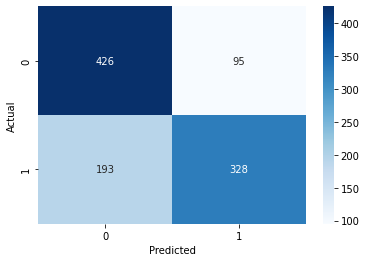

In [44]:
import seaborn as sns
import pylab as plt
sns.heatmap(conf, cmap="Blues", annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")